In [ ]:
# google.colab içerisindeki files kütüphanesi kullanılarak veri setini colab çalışma ortamına yüklüyoruz.
from google.colab import files

upload = files.upload()

Saving teknofest_train.csv to teknofest_train.csv


# Importing data and analyse

In [ ]:
import pandas as pd

# Kullandığımız veri setindeki satırları "|" ayıracı ile ayırıyoruz. 
df = pd.read_csv('teknofest_train.csv', sep="|")
df.head()

,id,text,is_offensive,target
0,81c11060-a240-4d54-841b-9e2916039e85,çürük dişli,1,INSULT
1,be80ebbf-b322-4c3b-afa1-94932ea80731,Bu adamın islama ve müslümanlara verdiği zarar...,1,RACIST
2,f99e2513-83ed-4076-ac72-b9e2cff3f049,erkekler zora gelmez,1,SEXIST
3,83ed2b2e-b815-4f36-9fc4-80a9050cf2d0,Utanmazın götüne kazık sokmuşlar bu tıkırtı ne...,1,PROFANITY
4,d93e05f7-bfdd-4cdb-99d8-3048761b30ff,otomasyon< sistemlerine= doğrudan bağlanabilir,0,OTHER


In [ ]:
# Veri seti hakkında bilgileri yazdırdık.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12617 entries, 0 to 12616
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            12617 non-null  object
 1   text          12617 non-null  object
 2   is_offensive  12617 non-null  int64 
 3   target        12617 non-null  object
dtypes: int64(1), object(3)
memory usage: 394.4+ KB


## PIE_CHART

([<matplotlib.patches.Wedge at 0x7f67406ac9d0>,
 [Text(-0.8619142294072861, 0.6834499697455874, 'Positive'),
  Text(0.861914293396487, -0.6834498890473499, 'Negative')],
 [Text(-0.470135034222156, 0.3727908925885021, '28.7%'),
  Text(0.4701350691253564, -0.37279084857128175, '71.3%')])

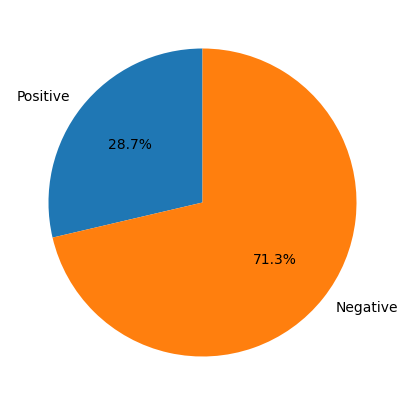

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15, 5)

# OTHER kategorisindeki veri adetini hesapladik.
positive = len(df[df['target'] == 'OTHER'])
# (RACIST+INSULT+PROFANITY+SEXIST) kategorisindeki veri adetini hesapladik.
negative = len(df[df['target'] != 'OTHER'])
# Dairesel grafikteki verilerimizi ayarladık.
pie_y = [positive, negative]
# Dairesel grafikteki verilerimizin adını ayarladık.
pie_labels = ["Pozitif (OTHER)", "Negatif (RACIST+INSULT+PROFANITY+SEXIST"]

# Dairesel grafiğimizi oluşturduk.
plt.pie(pie_y, labels=pie_labels, startangle=90, autopct='%1.1f%%')

## Her bir kategorideki veri adeti

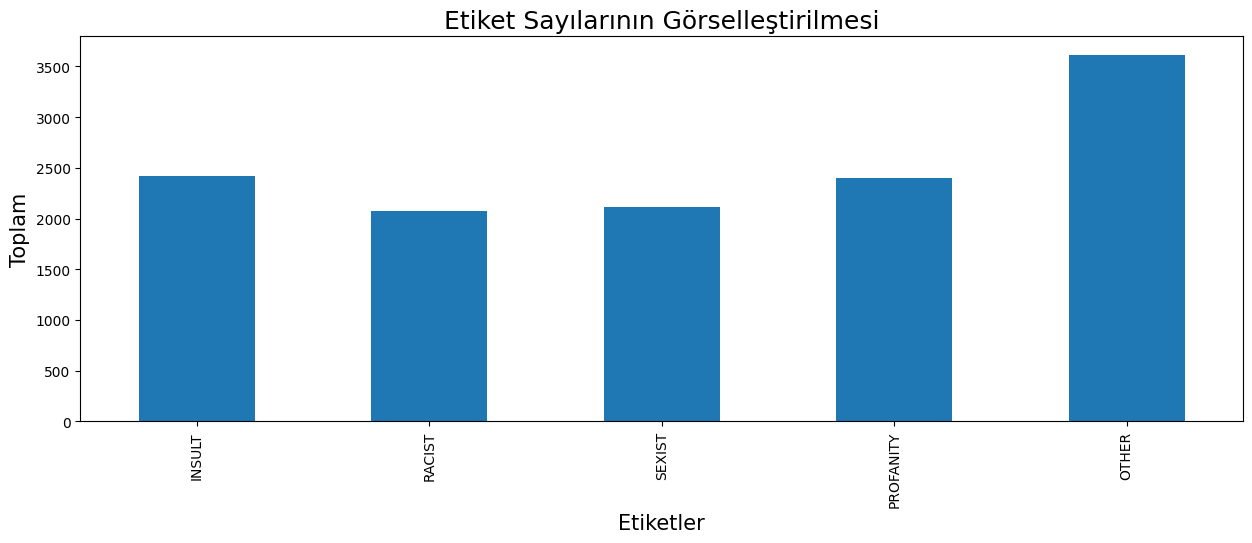

In [ ]:
from collections import Counter
# TARGET sütunundaki kategorileri bulduk.
tags = Counter(df["target"]).keys()
# TARGET sütunundaki kategorilerin adetini bulduk.
tags_len = Counter(df["target"]).values()

# Kategori ismi ve adet sayısını veri seti haline getirdik.
tag_df = pd.DataFrame(zip(tags, tags_len), columns=["Sinif", "Toplam"])
# Plot grafiğimizi oluşturduk.
tag_df.plot(x="Sinif", y="Toplam", kind="bar", legend=False, grid=False, figsize=(15,5))
# Plot grafiğimizin başlığını ayarladık.
plt.title("Etiket Sayılarının Görselleştirilmesi", fontsize=18)
# Plot grafiğimizin x ekseni başlığını ayarladık.
plt.xlabel("Etiketler", fontsize=15)
# Plot grafiğimizin y ekseni başlığını ayarladık.
plt.ylabel("Toplam", fontsize=15)
# Plot grafiğimizi ekrana yazdırdık.
plt.show()

## Temizlemeden önceki en sık kulanılan kelimeler - barplot

In [ ]:
import nltk
import string
nltk.download('punkt')

# Bir kategorideki en sık geçen kelimeleri bulmaya yarayan fonksiyonumuzu tanımladık.
def word_freq(CATEGORY, TEXTS):
  # Parametre olarak verilen kategoriyi kullanarak veri setimizi oluşturduk.
  freq_df = df[df['target'] == CATEGORY]
  # Kategorimizin text sınıfındaki satırlardaki kelimeleri bir değişkene aktardık.
  freq_words = freq_df[TEXTS].tolist()
  freq_words = [i.lower() for i in freq_words]
  freq_punc = []
  # Dizimizdeki kelimelerin sıklığındaki noktalama işaretlerini saydık.
  for o in freq_words:
    freq_punc += nltk.word_tokenize(o)
  freq_punc = [o for o in freq_punc if o not in string.punctuation]
  freq_freq = Counter(freq_punc)
  # En sık geçen 15 kelimeyi bir değişkene atadık.
  freq_top = freq_freq.most_common(15)


  words = [word for word, _ in freq_top]
  
  counts = [counts for _, counts in freq_top]

  # Sütun grafiğimizi oluşturduk.
  plt.bar(words, counts)
  # Sütun grafiğimizin başlığını ayarladık.
  plt.title(f"{CATEGORY} SINIFINDAKI EN SIK GECEN 15 KELIME")
  # Sütun grafiğimizin y ekseni başlığını ayarladık.
  plt.ylabel("Frekans")
  # Sütun grafiğimizin x ekseni başlığını ayarladık.
  plt.xlabel("Kelimeler")
  # Sütün grafiğimizi ekrana bastırdık.
  plt.show()

  # WordCloud'da kullanmak için en sık geçen kelimeleri döndürdük.
  return freq_top

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


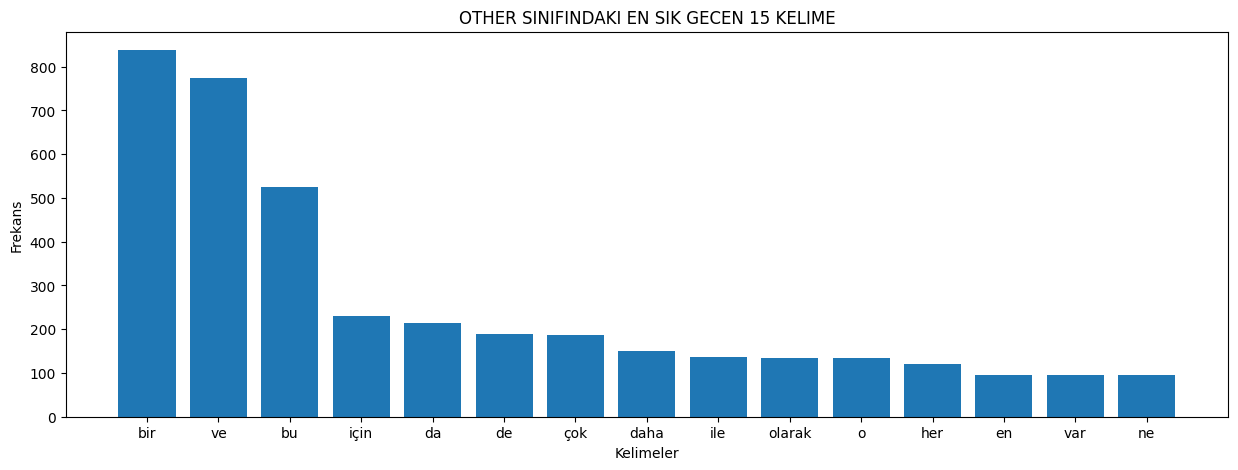

In [ ]:
# OTHER kategorisindeki en sık geçen 15 kelimeyi gösteren grafiği ekrana yazdırdık.
other_top = word_freq('OTHER', 'text')

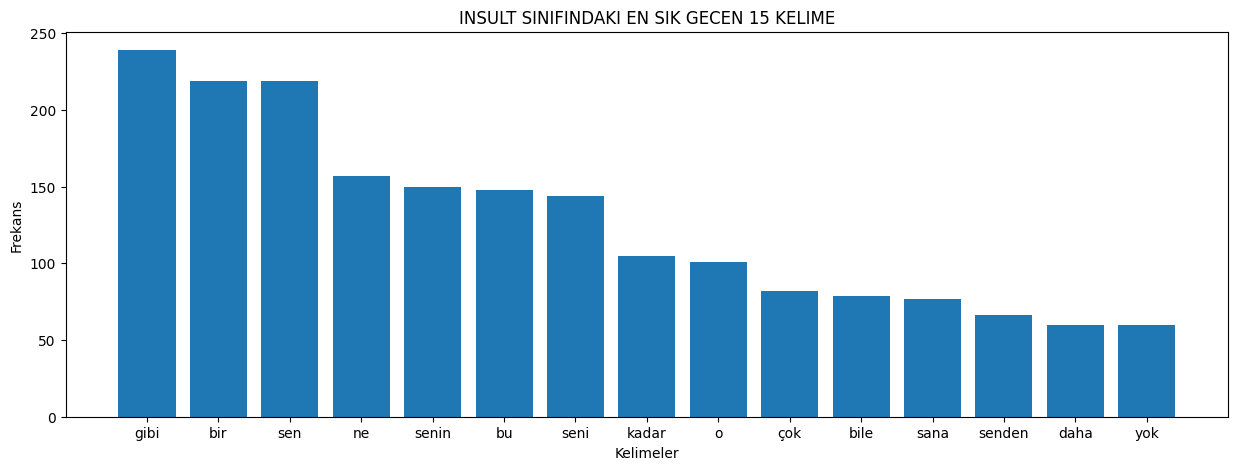

In [ ]:
# INSULT kategorisindeki en sık geçen 15 kelimeyi gösteren grafiği ekrana yazdırdık.
insult_top = word_freq('INSULT', 'text')

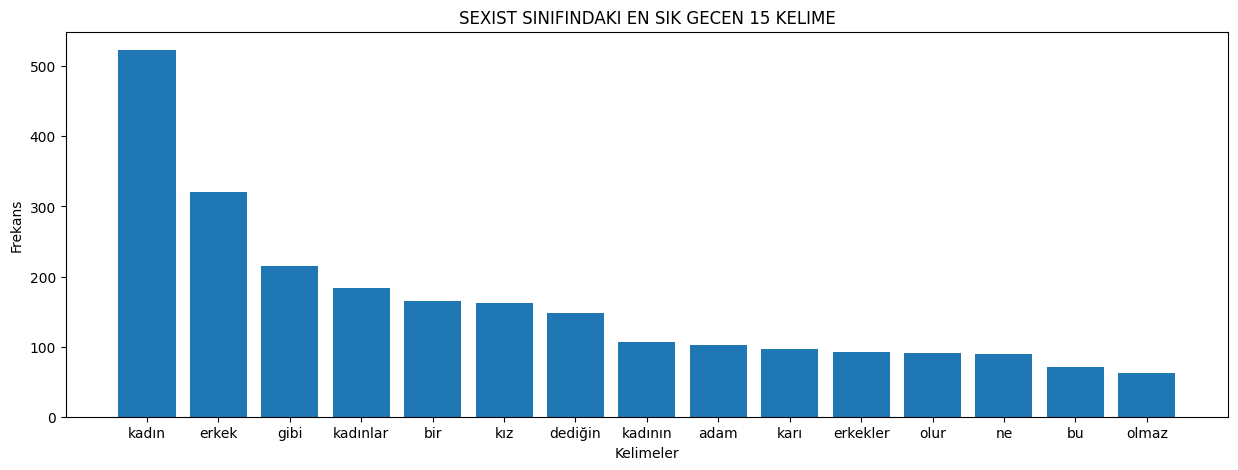

In [ ]:
# SEXIST kategorisindeki en sık geçen 15 kelimeyi gösteren grafiği ekrana yazdırdık.
sexist_top = word_freq('SEXIST', 'text')

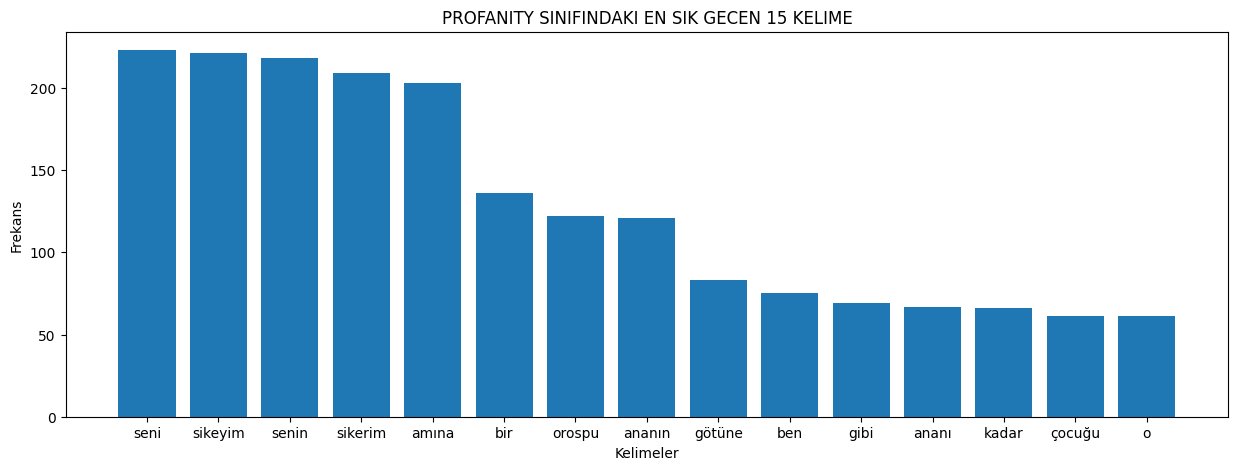

In [ ]:
# PROFANITY kategorisindeki en sık geçen 15 kelimeyi gösteren grafiği ekrana yazdırdık.
profanity_top = word_freq('PROFANITY', 'text')

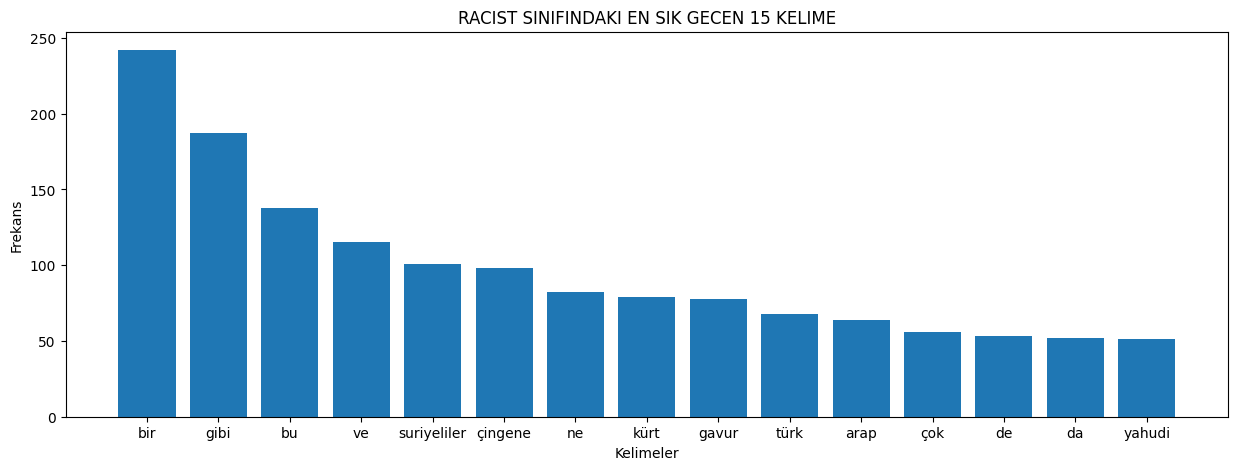

In [ ]:
# RACIST kategorisindeki en sık geçen 15 kelimeyi gösteren grafiği ekrana yazdırdık.
racist_top = word_freq('RACIST', 'text')

# Temizlemeden önceki en sık kullanılan kelimeler her bir kategori icin - cloud

In [ ]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from wordcloud import WordCloud

# En sık geçen kelimeleri sözcük bulutu şeklinde yazdıran fonksiyonu tanımladık.
def print_wordcloud(dict_top):
  # Liste halindeki verileri 
  dict_top = dict(dict_top)
  # Sözcük bulutumuzu oluşturduk.
  wordcloud = WordCloud(width=350, height=350, background_color='black', min_font_size=5).generate_from_frequencies(dict_top)

  # Grafik boyutunu ayarladık.
  plt.figure(figsize=(5,9), facecolor=None)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout(pad=0)
  # Grafiğimizi ekrana yazdırdık.
  plt.show()

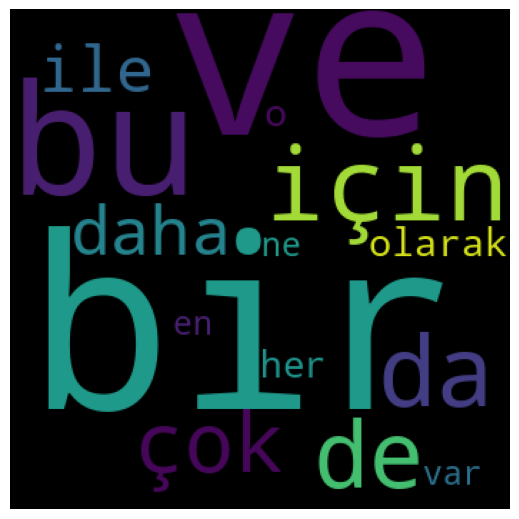

In [ ]:
# OTHER kategorisindeki en sık kullanılan 15 kelimeyi sözcük bulutu halinde ekrana yazdırdık.
print_wordcloud(other_top)

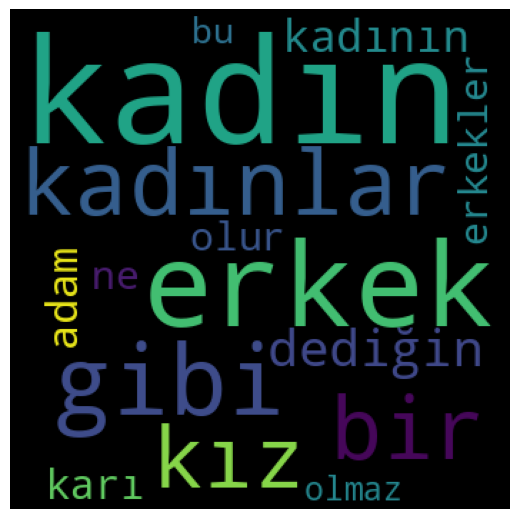

In [ ]:
# SEXIST kategorisindeki en sık kullanılan 15 kelimeyi sözcük bulutu halinde ekrana yazdırdık.
print_wordcloud(sexist_top)

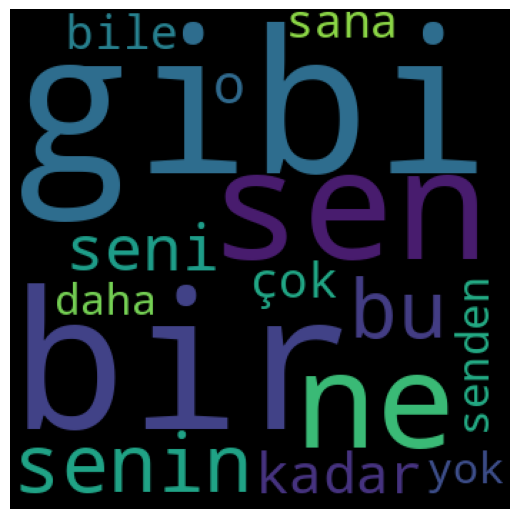

In [ ]:
# INSULT kategorisindeki en sık kullanılan 15 kelimeyi sözcük bulutu halinde ekrana yazdırdık.
print_wordcloud(insult_top)

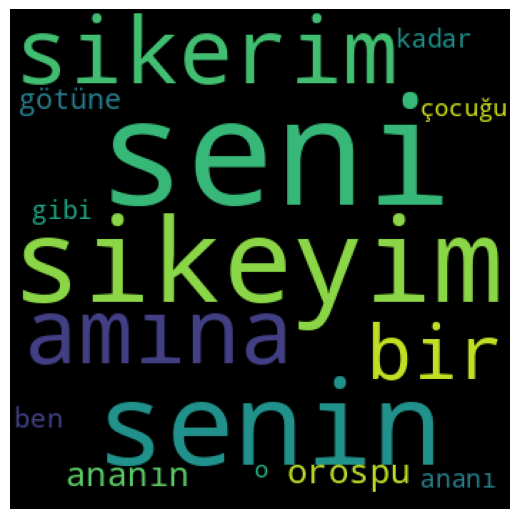

In [ ]:
# PROFANITY kategorisindeki en sık kullanılan 15 kelimeyi sözcük bulutu halinde ekrana yazdırdık.
print_wordcloud(profanity_top)

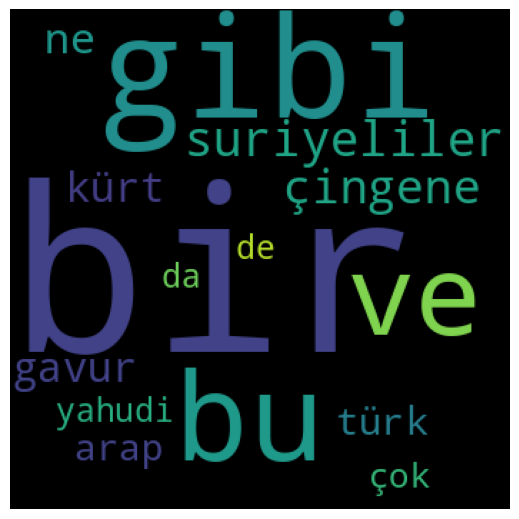

In [ ]:
# RACIST kategorisindeki en sık kullanılan 15 kelimeyi sözcük bulutu halinde ekrana yazdırdık.
print_wordcloud(racist_top)

# Preprocess

In [ ]:
import nltk

# Veri setindeki "text" sütunu altındaki hatalı alanları temizlemek için bir dizi oluşturduk.
false_text = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']

In [ ]:
# Ön işleme adımlarını yapmak için fonksiyonumuzu tanımlıyoruz.
def preprocess_text(text):
    # Küçük harflere çevirme
    text = text.lower()
    # Satır sonu karakterlerini kaldırma
    import re
    text = re.sub(r'\n', ' ', text)
    # Rakamları kaldırma
    text = re.sub(r'\d', '', text)
    # Noktalama işaretlerini kaldırma
    import string
    text = text.translate(str.maketrans("", "", string.punctuation))
    words = text.split()
    # Veri setindeki hatalı verilerin kaldırılması
    words = [word for word in words if not word in false_text]
    # Tekrarlanan karakterlerin kaldırılması
    words = [re.sub(r'(.)\1{1,}', r'\1\1', word) for word in words]
    # Tekrarlanan boşlukların kaldırılması
    words = [word.strip() for word in words if len(word.strip()) > 1]
    
    text = " ".join(words)
    return text

In [ ]:
# Veri setindeki sütün başlıklarını yazdırdık.
df.columns

Index(['id', 'text', 'is_offensive', 'target'], dtype='object')

In [ ]:
# Veri setimizde "clean_text" adında bir sütün oluşturarak ön işleme fonksiyonumuz olan "preprocess_text" fonksiyonunu "text" sütünü altındaki verilere uygulayarak "clean_text" sütünuna aktardık. 
df['clean_text'] = df['text'].apply(preprocess_text)

In [ ]:
# Ön işleme işleminden sonra veri setinimizin ilk 5 satırına bakalım.
df.head()

,id,text,is_offensive,target,clean_text
0,81c11060-a240-4d54-841b-9e2916039e85,çürük dişli,1,INSULT,çürük dişli
1,be80ebbf-b322-4c3b-afa1-94932ea80731,Bu adamın islama ve müslümanlara verdiği zarar...,1,RACIST,bu adamın islama ve müslümanlara verdiği zarar...
2,f99e2513-83ed-4076-ac72-b9e2cff3f049,erkekler zora gelmez,1,SEXIST,erkekler zora gelmez
3,83ed2b2e-b815-4f36-9fc4-80a9050cf2d0,Utanmazın götüne kazık sokmuşlar bu tıkırtı ne...,1,PROFANITY,utanmazın götüne kazık sokmuşlar bu tıkırtı ne...
4,d93e05f7-bfdd-4cdb-99d8-3048761b30ff,otomasyon< sistemlerine= doğrudan bağlanabilir,0,OTHER,otomasyon sistemlerine doğrudan bağlanabilir


In [ ]:
# Veri setimiz hakkında genel bilgileri yazdırdık.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12617 entries, 0 to 12616
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            12617 non-null  object
 1   text          12617 non-null  object
 2   is_offensive  12617 non-null  int64 
 3   target        12617 non-null  object
 4   clean_text    12617 non-null  object
dtypes: int64(1), object(4)
memory usage: 493.0+ KB


## Temizledikten sonra en çok kullanılan kelimeler - her bir kategori için boxplot

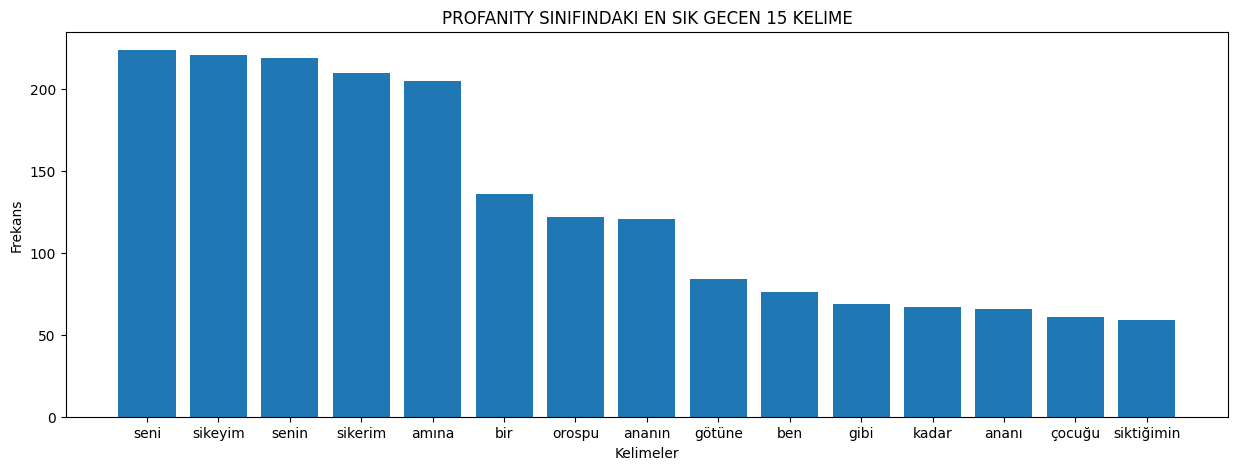

In [ ]:
# Temizleme işleminden sonra PROFANITY kategorindeki en sık geçen 15 kelimeyi ekrana yazdırdık.
profanity_cleaned_top = word_freq('PROFANITY', 'clean_text')

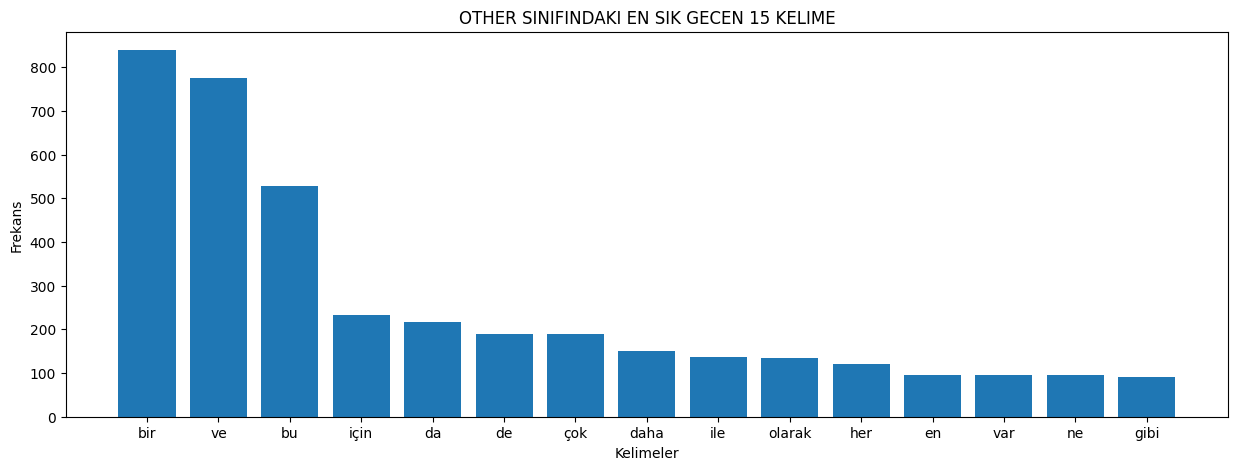

In [ ]:
# Temizleme işleminden sonra OTHER kategorindeki en sık geçen 15 kelimeyi ekrana yazdırdık.
other_cleaned_top = word_freq('OTHER', 'clean_text')

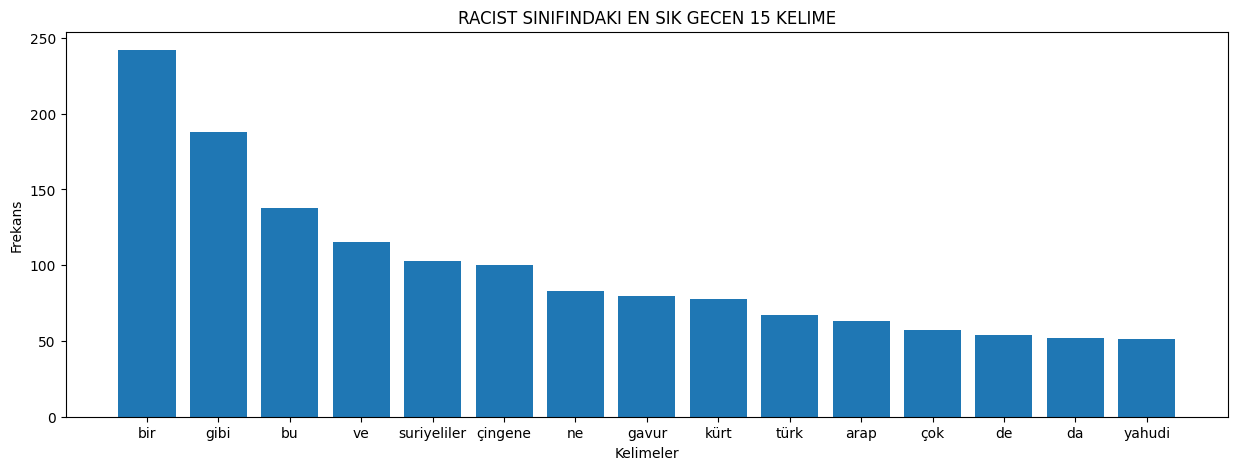

In [ ]:
# Temizleme işleminden sonra RACIST kategorindeki en sık geçen 15 kelimeyi ekrana yazdırdık.
racist_cleaned_top = word_freq('RACIST', 'clean_text')

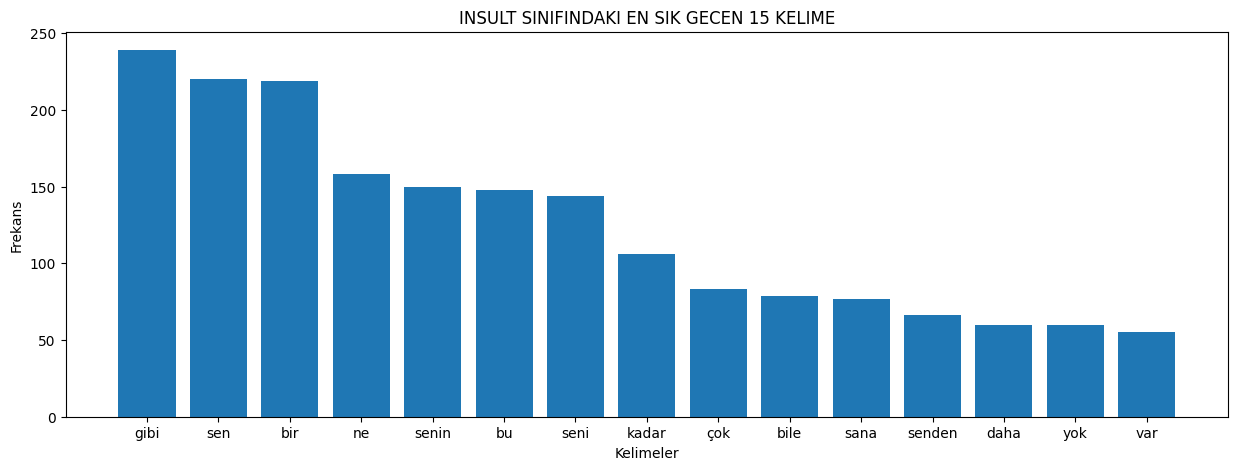

In [ ]:
# Temizleme işleminden sonra INSULT kategorindeki en sık geçen 15 kelimeyi ekrana yazdırdık.
insult_cleaned_top = word_freq('INSULT', 'clean_text')

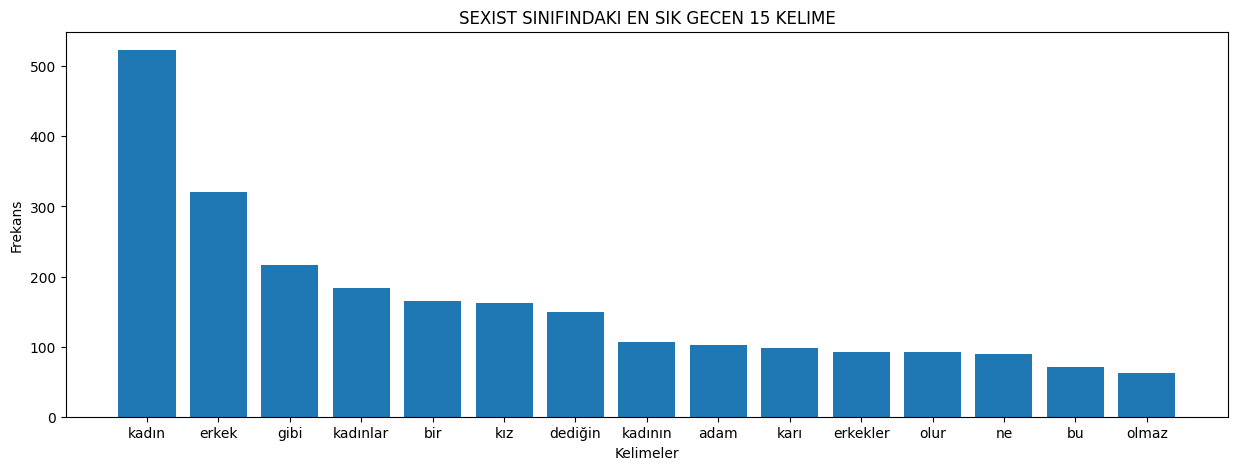

In [ ]:
# Temizleme işleminden sonra SEXIST kategorindeki en sık geçen 15 kelimeyi ekrana yazdırdık.
sexist_cleaned_top = word_freq('SEXIST', 'clean_text')

## Temizledikten sonra en çok kullanılan kelimeler- her bir kategori icin cloud

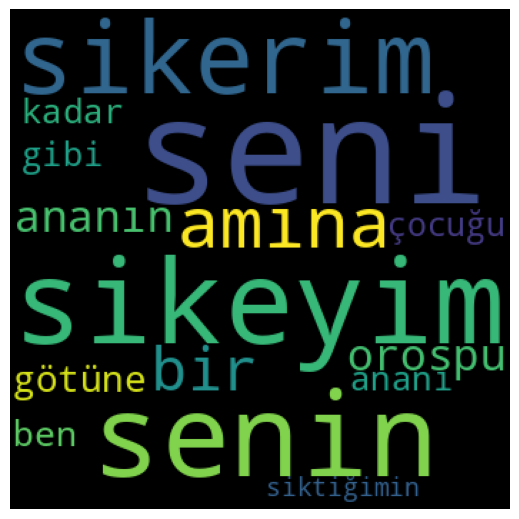

In [ ]:
# Temizleme işleminden sonra PROFANITY kategorindeki en sık geçen 15 kelimeyi sözcük bulut şeklinde ekrana yazdırdık.
print_wordcloud(profanity_cleaned_top)

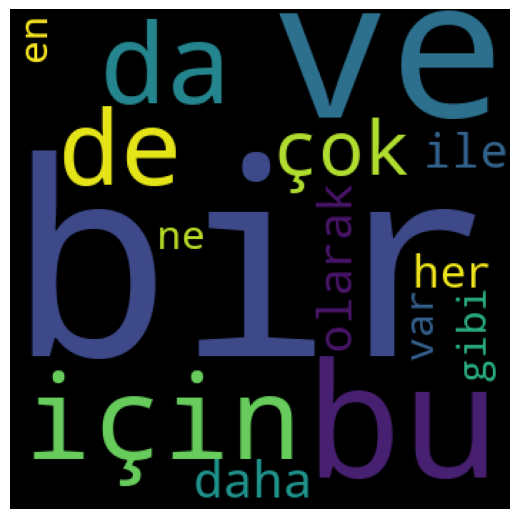

In [ ]:
# Temizleme işleminden sonra OTHER kategorindeki en sık geçen 15 kelimeyi sözcük bulut şeklinde ekrana yazdırdık.
print_wordcloud(other_cleaned_top)

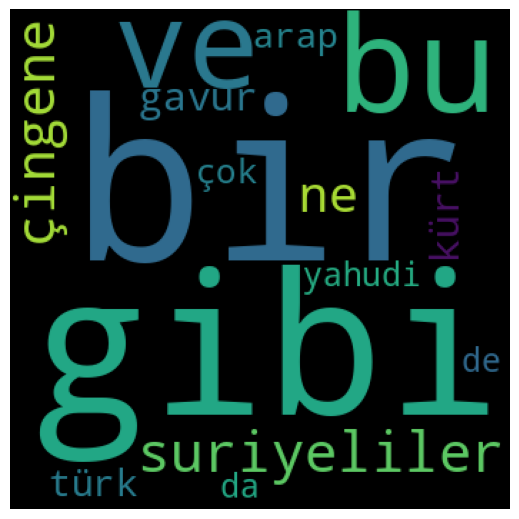

In [ ]:
# Temizleme işleminden sonra RACIST kategorindeki en sık geçen 15 kelimeyi sözcük bulut şeklinde ekrana yazdırdık.
print_wordcloud(racist_cleaned_top)

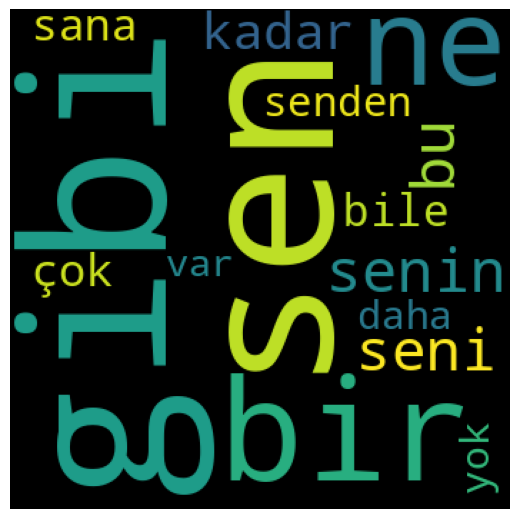

In [ ]:
# Temizleme işleminden sonra INSULT kategorindeki en sık geçen 15 kelimeyi sözcük bulut şeklinde ekrana yazdırdık.
print_wordcloud(insult_cleaned_top)

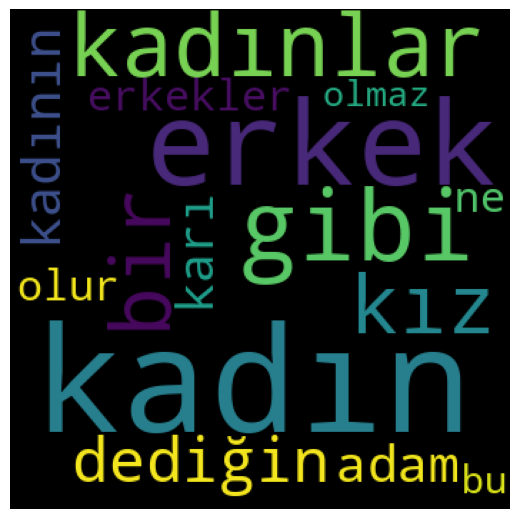

In [ ]:
# Temizleme işleminden sonra SEXIST kategorindeki en sık geçen 15 kelimeyi sözcük bulut şeklinde ekrana yazdırdık.
print_wordcloud(sexist_cleaned_top)

In [ ]:
from sklearn.preprocessing import LabelEncoder
# LabelEncoder kullanarak "target" sütunumuza dönüşüm yaptırdık.
le = LabelEncoder().fit(df["target"])
# "Name Mapping" işlemini tanımladık.
le_nm = dict(zip(le.classes_, le.transform(le.classes_)))
# Veri setimizde "labels" adında sütun oluşturarak "target" sütununa "Name Mapping" işlemi yaparak "labels" sütunu altına aktardık.
df["labels"] = df["target"].apply(lambda x: le_nm[x])
# "id", "text", "target" sütunlarını veri setimizden çıkardık.
df = df.drop(['id', 'text', 'target'], axis=1)

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 57.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 100.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 26.8 MB/s eta 0:00:00


In [ ]:
# "Name Mapping" işleminden sonra veri setimizin ilk 5 elemanını yazdırdık.
df.head()

,is_offensive,clean_text,labels
0,1,çürük dişli,0
1,1,bu adamın islama ve müslümanlara verdiği zarar...,3
2,1,erkekler zora gelmez,4
3,1,utanmazın götüne kazık sokmuşlar bu tıkırtı ne...,2
4,0,otomasyon sistemlerine doğrudan bağlanabilir,1


In [ ]:
# LabelEncode işleminden sonra her bir kategorinin temsil ettiği sayılar.
# INSULT -> 0
# OTHER -> 1
# PROFANITY -> 2
# RACIST -> 3
# SEXIST -> 4
le_nm

{'INSULT': 0, 'OTHER': 1, 'PROFANITY': 2, 'RACIST': 3, 'SEXIST': 4}

In [ ]:
import numpy as np
import torch
from transformers import BertTokenizer, BertModel

# Verilerimizi BERT'e uygun biçimde dönüştürmemiz gerekiyor. Bunu da Hugging Face'den önceden eğitilmiş "bert-base-turkish-cased" modelini kullanarak yapıyoruz.
tokenizer = BertTokenizer.from_pretrained("dbmdz/bert-base-turkish-cased")
# LabelEncode işleminden sonra "target" sütunundaki kategorik sınıflandırmayı bir değişkene atadık.
labels = le_nm

class Dataset(torch.utils.data.Dataset):
    def __init__(self, df):
      # Kategorik sınıflar.
      self.labels = [label for label in df['labels']]
      # text = Modeli eğitmek için kullanılacak veri setindeki "clean_text" sütunundaki her bir satır.
      # padding = Her bir diziyi belirttiğimiz maksimum uzunluga kadar doldurmak için.
      # max_length = Her bir dizinin maksimum uzunluğu
      # truncation = Eğer değeri "True" ise dizimiz maksimum uzunluğu aşar ise onu keser.
      # return_tensors = Döndürelecek tensörlerin türü. Pytorch kullandığımız için "pt" yazıyoruz. Tensorflow kullansaydık "tf" yazmamız gerekirdi.
      self.text = [tokenizer(text, padding='max_length', max_length=512, truncation=True, return_tensors="pt") for text in df['clean_text']]

    def classes(self):
      return self.labels

    def __len__(self):
      return len(self.labels)

    def get_batch_labels(self, idx):
      # Bir grup etiket getir.
      return np.array(self.labels[idx])

    def get_batch_texts(self, idx):
      # Bir grup girdi getir.
      return self.text[idx]

    def __getitem__(self, idx):
      batch_texts = self.get_batch_texts(idx)
      batch_y = self.get_batch_labels(idx)

      return batch_texts, batch_y

In [ ]:
def train_validate_test_split(df):
    # Rastgelelik durumu.
    np.random.seed(4242)
    # Diziyi rastgele permute eder.
    perm = np.random.permutation(df.index)
    # Veri setinin %60'ının sayısal değeri hesaplandı.
    train_end = int(.6 * len(df.index))
    # Veri setinin %20'sinin sayısal değeri hesaplandı.
    validate_end = int(.2 * len(df.index)) + train_end
    # Veri setinin %60'ını train etmek için ayırdık.
    train = df.iloc[perm[:train_end]]
    # Veri setinin %20'sini validation etmek için ayırdık.
    validate = df.iloc[perm[train_end:validate_end]]
    # Veri setinin %20'sini test etmek için ayırdık.
    test = df.iloc[perm[validate_end:]]
    # train, validation, test veri setlerini döndür.
    return train, validate, test

# Train, Validation ve Test için veri setlerimiz oluşturduk.
df_train, df_validation, df_test = train_validate_test_split(df)
# Train, Validation ve Test için oluşturduğumuz veri setlerinin uzunluğunu ekrana yazdırdık. (%60 - %20 - %20)
print(len(df_train), len(df_validation), len(df_test))

7570 2523 2524


# Train

In [ ]:
class BertClassifier(torch.nn.Module):
  def __init__(self, dropout=0.5):
    super(BertClassifier, self).__init__()
    
    self.bert = BertModel.from_pretrained("dbmdz/bert-base-turkish-cased")
    self.dropout = torch.nn.Dropout(dropout)
    # Kullandığımız önceden eğilmiş model "base" sınıfına ait bir BERT modelidir. Yani;
    # 12 layers of Transformer encoder, 12 attention heads, 768 hidden size, 110M parameters.
    # 768, BERT-base modelindeki hidden size'yi, 5 ise veri setimizdeki toplam kategori sayısını temsil ediyor.
    self.linear = torch.nn.Linear(768, 5)
    self.relu = torch.nn.ReLU()

  def forward(self, input_id, mask):
    # _ değişkeni dizideki tüm belirteçlerin gömme vektörlerini içerir.
    # pooled_output değişkeni [CLS] belirtecinin gömme vektörünü içerir.
    # Metin sınıflandırma için polled_output değişkenini girdi olarak kullanmak yeterlidir.

    # Attention mask, bir belirtecin gercek bir kelimemi yoksa dolgu mu olduğunu tanımlar.
    # Eğer gerçek bir kelime ise attention_mask=1, eğer dolgu ise attention_mask=0 olacaktır.
    # return_dict, değeri "True ise" bir BERT modeli tahmin, eğitim veya değerlendirme sırasında ortaya çıkan
    # loss, logits, hidden_states ve attentions dan oluşan bir tuple oluşturacaktır.
    _, pooled_output = self.bert(input_ids=input_id, attention_mask=mask, return_dict=False)
    dropout_output = self.dropout(pooled_output)
    linear_output = self.linear(dropout_output)
    final_layer = self.relu(linear_output)

    return final_layer

In [ ]:
!pip install tqdm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Eğitim tur sayısı
EPOCHS = 2
# BERT model tanımlaması.
model = BertClassifier()
# Öğrenme oranı
LR = 1e-6

# Train ve Validation için ayırdığımız veri setlerini 
train, validation = Dataset(df_train), Dataset(df_validation)

# Verilerin toplu olarak içe aktarılması için DataLoader kullanıyoruz.
# batch_size, model güncellenmeden önce işlenen örnek sayısıdır.
# shuffle, karıştır.
tdl = torch.utils.data.DataLoader(train, batch_size=2, shuffle=True)
vdl = torch.utils.data.DataLoader(validation, batch_size=2)
device = torch.device("cuda")

# Çok sınıflı sınıflandırma kullandığımız için çapraz entropi kullanmamız gerekiyor.
criterion = torch.nn.CrossEntropyLoss().cuda()
# Optimizer için Adam kullanıyoruz.
optimizer = torch.optim.Adam(model.parameters(), lr=LR)
model = model.cuda()

for EPOCH in range(EPOCHS):
    # Toplam eğitim doğruluğu
    total_train_accuracy = 0
    # Toplam eğitim kaybı
    total_train_loss = 0
     # Toplam validation doğruluğu
    total_validation_accuracy = 0
    # Toplam validation kaybı
    total_validation_loss = 0
    
    # tqdm kütüphanesi, "Progress Bar" oluşturmaya yarar.
    from tqdm import tqdm
    for train_input, train_label in tqdm(tdl):
        # Modelin verileri işleyebilmesi için hem modelin hem de verilerin CPU veya GPU olmak üzere aynı cihazda olması gerekir.
        # Örneğin veriler CPU'da, model GPU'da olursa çalışma zamanı hatası oluşacaktır. 
        # Bunu önlemek için pytorch kütüphanesinden "to" fonksiyonunu kullanıyoruz.
        train_label = train_label.to(device)

        # Attention mask, bir belirtecin gercek bir kelimemi yoksa dolgu mu olduğunu tanımlar.
        # Eğer gerçek bir kelime ise attention_mask=1, eğer dolgu ise attention_mask=0 olacaktır.
        mask = train_input['attention_mask'].to(device)
        # input_ids, her bir tokenin id gösterimidir.
        input_id = train_input['input_ids'].squeeze(1).to(device)

        # Modelin eğitim verileri üzerindeki tahminlerinin sonuçları saklanır.
        output = model(input_id, mask)
        
        # Çapraz entropi ile örneklem kaybını hesaplıyoruz.
        batch_loss = criterion(output, train_label.long())
        # Her bir epoch için toplam train kaybını bulmak için her bir örneklemin train kaybını topluyoruz.
        total_train_loss += batch_loss.item()
        
        # "output" değişkenindeki her bir veri örneği için çıktı tensöründe en yüksek olasılığa sahip
        # sınıfın indexini döndürür. Daha sonra "train_label" adlı tensörde modein doğru sınıf tahmilnerinin
        # bulunduğu etiketleri saklanır. Doğru tahmin edilen sınıfların sayısı hesaplanır ve "item"
        # fonksiyonu ile sayısal bir değere dönüştürülür.
        train_accuracy = (output.argmax(dim=1) == train_label).sum().item()
        # Her bir epoch için toplam train doğruluğunu bulmak için her bir örneklemin doğruluk kaybını topluyoruz.
        total_train_accuracy += train_accuracy

        # Gradyanlar, modelin kaybını optimize etmek için geriye doğru hesaplanır ve eğitim adımlarında kullanılır.
        # Pytorch'da Gradyanlar biriktirilir ve önceki gradyan üzerine eklenir. Bu nedenle, modelin bir sonraki eğitim
        # adımında geçerli gradyan değerlerini kullanabilmesi için, gradyanların önce sıfırlanması gerekir.
        # Bu işlemi de "zero_grad" fonksiyonunu kullanarak yapıyoruz.
        model.zero_grad()

        # Kayıp fonksiyonunun gradyanını hesaplamak ve bu gradyanı kullanarak modelin ağırlıklarının güncellenmesi için
        # geriye doğru geçiş (backpropagation) işlemini başlatıyoruz.
        batch_loss.backward()
        
        #step(), optimize edicinin güncellemesi gereken tüm tensörler üzerinde yineleme yapmasını ve değerlerini güncellemek için dahili olarak depolanan gradlarını kullanmasını sağlar
        optimizer.step()

    # Doğrulama işlemi sırasında model ağırlıklarını değiştirmeyeceğimiz modelin gradyanlara ihtiyacı yoktur
    # "no_grad" fonksiyonu ile gradyan hesaplarını devre dışı bırakıyoruz.
    with torch.no_grad():
        # tqdm kütüphanesi, "Progress Bar" oluşturmaya yarar.
        for val_input, val_label in tqdm(vdl):
            # Modelin verileri işleyebilmesi için hem modelin hem de verilerin CPU veya GPU olmak üzere aynı cihazda olması gerekir.
            # Örneğin veriler CPU'da, model GPU'da olursa çalışma zamanı hatası oluşacaktır. 
            # Bunu önlemek için pytorch kütüphanesinden "to" fonksiyonunu kullanıyoruz.
            val_label = val_label.to(device)

            # Attention mask, bir belirtecin gercek bir kelimemi yoksa dolgu mu olduğunu tanımlar.
            # Eğer gerçek bir kelime ise attention_mask=1, eğer dolgu ise attention_mask=0 olacaktır.
            mask = val_input['attention_mask'].to(device)
            input_id = val_input['input_ids'].squeeze(1).to(device)

            # Modelin eğitim verileri üzerindeki tahminlerinin sonuçları saklanır.
            output = model(input_id, mask)

            # Çapraz entropi ile örneklem kaybını hesaplıyoruz.
            batch_loss = criterion(output, val_label.long())
            # Her bir epoch için toplam train kaybını bulmak için her bir örneklemin train kaybını topluyoruz.
            total_validation_loss += batch_loss.item()

            # "output" değişkenindeki her bir veri örneği için çıktı tensöründe en yüksek olasılığa sahip
            # sınıfın indexini döndürür. Daha sonra "train_label" adlı tensörde modein doğru sınıf tahmilnerinin
            # bulunduğu etiketleri saklanır. Doğru tahmin edilen sınıfların sayısı hesaplanır ve "item"
            # fonksiyonu ile sayısal bir değere dönüştürülür.
            validation_accuracy = (output.argmax(dim=1) == val_label).sum().item()
            # Her bir epoch için toplam train doğruluğunu bulmak için her bir örneklemin doğruluk kaybını topluyoruz.
            total_validation_accuracy += validation_accuracy
    
    # Mevcut Epoch
    print(f'Epochs: {EPOCH + 1}')
    # Train Kaybı
    print(f'Train Loss: {total_train_loss / len(df_train): .4f}')
    # Train Dogruluk
    print(f'Train Accuracy: {total_train_accuracy / len(df_train): .4f}')
    # Validation Kaybı
    print(f'Validation Loss: {total_validation_loss / len(df_validation): .4f}')
    # Validation Dogruluk
    print(f'Validation Accuracy: {total_validation_accuracy / len(df_validation): .4f}')

Some weights of the model checkpoint at dbmdz/bert-base-turkish-cased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
100%|██████████| 1262/1262 [01:27<00:00, 14.45it/s]


Epochs: 1
Train Loss:  0.5770
Train Accuracy:  0.5736
Validation Loss:  0.2851
Validation Accuracy:  0.8450


100%|██████████| 1262/1262 [01:26<00:00, 14.52it/s]

Epochs: 2
Train Loss:  0.1927
Train Accuracy:  0.8915
Validation Loss:  0.1601
Validation Accuracy:  0.9045


# Evaluation

In [ ]:
# Test için ayırdığımız veri setlerini 
test = Dataset(df_test)

# Verilerin toplu olarak içe aktarılması için DataLoader kullanıyoruz.
# batch_size, model güncellenmeden önce işlenen örnek sayısıdır.
# shuffle, karıştır.
tdl = torch.utils.data.DataLoader(test, batch_size=2)
device = torch.device("cuda")
model = model.cuda()

# Toplam test doğruluğu
total_test_accuracy = 0

# Test işlemi sırasında model ağırlıklarını değiştirmeyeceğimiz modelin gradyanlara ihtiyacı yoktur
# "no_grad" fonksiyonu ile gradyan hesaplarını devre dışı bırakıyoruz.
with torch.no_grad():
  for test_input, test_label in tdl:
    # Modelin verileri işleyebilmesi için hem modelin hem de verilerin CPU veya GPU olmak üzere aynı cihazda olması gerekir.
    # Örneğin veriler CPU'da, model GPU'da olursa çalışma zamanı hatası oluşacaktır. 
    # Bunu önlemek için pytorch kütüphanesinden "to" fonksiyonunu kullanıyoruz.
    test_label = test_label.to(device)

    # Attention mask, bir belirtecin gercek bir kelimemi yoksa dolgu mu olduğunu tanımlar.
    # Eğer gerçek bir kelime ise attention_mask=1, eğer dolgu ise attention_mask=0 olacaktır.
    mask = test_input['attention_mask'].to(device)
    # squeeze() fonksiyonu ile "input_ids" özelliğindeki tensörlerin boyutu 1 olan boyutları
    # kaldırarak, tensörün boyutunu azaltıyoruz.
    input_id = test_input['input_ids'].squeeze(1).to(device)

    # Modelin eğitim verileri üzerindeki tahminlerinin sonuçları saklanır.
    output = model(input_id, mask)

    # "output" değişkenindeki her bir veri örneği için çıktı tensöründe en yüksek olasılığa sahip
    # sınıfın indexini döndürür. Daha sonra "test_label" adlı tensörde modein doğru sınıf tahmilnerinin
    # bulunduğu etiketleri saklanır. Doğru tahmin edilen sınıfların sayısı hesaplanır ve "item"
    # fonksiyonu ile sayısal bir değere dönüştürülür.
    test_accuracy = (output.argmax(dim=1) == test_label).sum().item()
    # Her bir epoch için toplam test doğruluğunu bulmak için her bir örneklemin doğruluk kaybını topluyoruz.
    total_test_accuracy += test_accuracy

# Test Dogruluğu
print(f'Test Accuracy: {total_test_accuracy / len(tdl): .3f}')

Test Accuracy:  1.819


# Prediction

In [ ]:
# Prediction fonksiyonunu tanımladık.
def predict(model, sentence):
  device = torch.device("cuda")
  model = model.cuda()
  # Prediction işlemi sırasında model ağırlıklarını değiştirmeyeceğimiz modelin gradyanlara ihtiyacı yoktur
  # "no_grad" fonksiyonu ile gradyan hesaplarını devre dışı bırakıyoruz.
  with torch.no_grad():
    # text = Modeli eğitmek için kullanılacak veri setindeki "clean_text" sütunundaki her bir satır.
    # padding = Her bir diziyi belirttiğimiz maksimum uzunluga kadar doldurmak için.
    # max_length = Her bir dizinin maksimum uzunluğu
    # truncation = Eğer değeri "True" ise dizimiz maksimum uzunluğu aşar ise onu keser.
    # return_tensors = Döndürelecek tensörlerin türü. Pytorch kullandığımız için "pt" yazıyoruz. Tensorflow kullansaydık "tf" yazmamız gerekirdi.
    input_id = tokenizer(sentence, padding='max_length', max_length = 512, truncation=True, return_tensors="pt")
    
    # Attention mask, bir belirtecin gercek bir kelimemi yoksa dolgu mu olduğunu tanımlar.
    # Eğer gerçek bir kelime ise attention_mask=1, eğer dolgu ise attention_mask=0 olacaktır.
    mask = input_id['attention_mask'].to(device)
    
    # squeeze() fonksiyonu ile "input_ids" özelliğindeki tensörlerin boyutu 1 olan boyutları
    # kaldırarak, tensörün boyutunu azaltıyoruz.
    input_id = input_id['input_ids'].squeeze(1).to(device)
    
    # Modelin eğitim verileri üzerindeki tahminlerinin sonuçları saklanır.
    output = model(input_id, mask)
    
    # Kategorik sınıfı döndür.
    return output.argmax(dim=1).item() 

In [ ]:
from sklearn.metrics import classification_report

# Her bir dizi için tahmin yapılır
actuals = df_test.labels
predicted = [predict(model, df_test.clean_text.iloc[i]) for i in range(len(df_test.clean_text))]

print(classification_report(actuals, predicted))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       489
           1       0.94      0.92      0.93       718
           2       0.93      0.92      0.93       477
           3       0.87      0.93      0.90       399
           4       0.93      0.92      0.92       441

    accuracy                           0.91      2524
   macro avg       0.91      0.91      0.91      2524
weighted avg       0.91      0.91      0.91      2524



## Predicted Confusion Matrix

In [ ]:
!pip install more-itertools

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


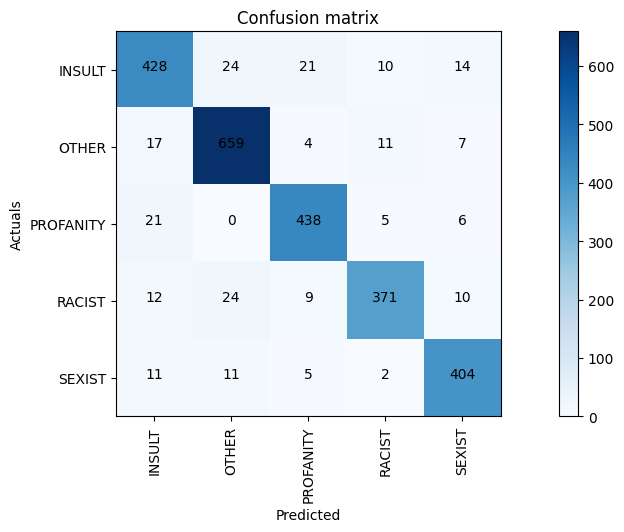

In [ ]:
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(predicted, actuals, sub_classes, title='Confusion matrix', cmap=plt.cm.Blues):
    # Confusion Matrix oluştur.
    confusion = confusion_matrix(predicted, actuals)

    # interpolation -> Grafikte kullanılacak renklerin aralığı
    # cmap -> Grafikte kullanılacak renk
    plt.imshow(confusion, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    # Alt sınıfların sayısına göre bir numpy dizisi oluşturduk.
    # Bu diziyi sınıf etiketlerinin eksenlerdeki konumlarını belirlemek için kullanacağız.
    tick_marks = np.arange(len(sub_classes))
    # rotation -> X ekseni işaretleyicilerinin açısı
    plt.xticks(tick_marks, sub_classes, rotation=90)
    plt.yticks(tick_marks, sub_classes)

    for i, j in itertools.product(range(confusion.shape[0]), range(confusion.shape[1])):
        # horizontalalignment, yazılacak sayısal değerin hücre ortasında yer almasını sağlar.
        # color, yazı rengini belirler.
        # j -> x koordinatı
        # i -> y koordinatı
        # confusion[i, j] -> yazılacak sayısal değer
        plt.text(j, i, confusion[i, j], horizontalalignment="center", color="black")

    # Figür boyutu
    plt.rcParams["figure.figsize"] = (15,5)
    # y Ekseni adı
    plt.ylabel('Actuals')
    # x Ekseni adı
    plt.xlabel('Predicted')
    #plt.savefig("cm_matrix.png")
    plt.show()
    
plot_confusion_matrix(predicted, actuals, sub_classes=le_nm.keys())

# Saving Model

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

# Modelimize isim vererek Drive'a kaydettik.
model_name = "bert_cased-without-stopwords.pt"
path = F"/content/gdrive/My Drive/{model_name}"

torch.save(model.state_dict(), path)